<a href="https://colab.research.google.com/github/arjnmj/ML-Fraud-Detection/blob/main/MODEL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df = pd.DataFrame(data)

## Data Visualization

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


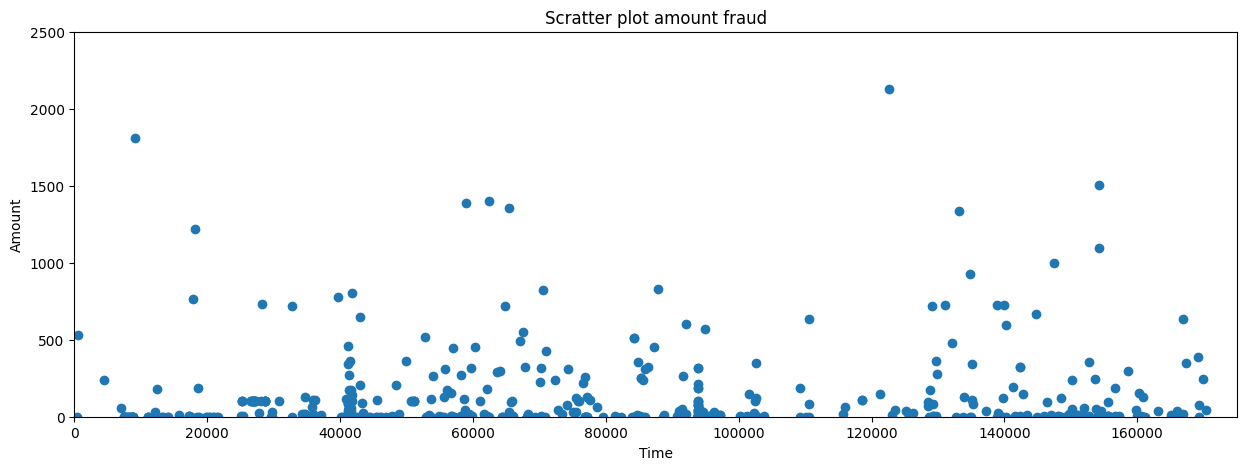

In [6]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [7]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only {} frauds where the amount was bigger than 1000 over {} frauds'.format(str(nb_big_fraud),str(df_fraud.shape[0]) ))

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


## Unbalanced Data

In [8]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))

There are only 492  frauds in the original dataset, even though there are 284315 no frauds in the dataset.


## Correlation of the features

In [9]:
df_corr = df.corr() # Pearson, Standard Correlation Coefficient

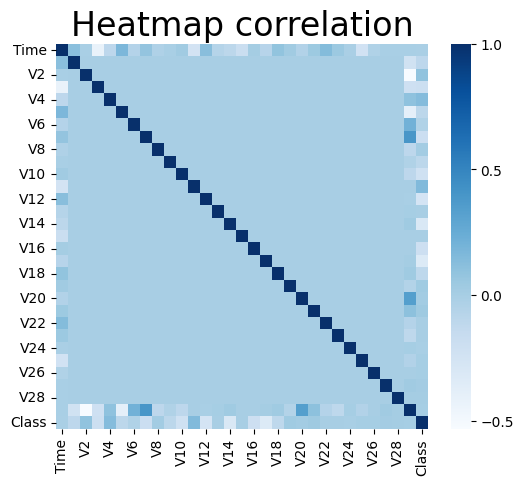

In [10]:
plt.figure(figsize=(6,5))
sns.heatmap(df_corr, cmap='Blues')
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

## Data Selection

In [11]:
df = df.drop(columns = ['Time'], axis = 1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
X = df.drop(columns=['Class'], axis=1)
y = df.Class
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,2.913952e-17
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02


Split data into **training set** and **testing set**. Split them into a 70/30 proportion, where 70% of data will be used for **training** while the 30% left will be used for **testing**.

In [21]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y,test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
print('X Train size: ', train_x.shape)
print('X Test size: ', test_x.shape)
print('X Test proportion ', "%s%%"%round((len(test_x) / (len(train_x) + len(test_x))) * 100))

X Train size:  (227845, 29)
X Test size:  (56962, 29)
X Test proportion  20%


In [23]:
print('Y Train size: ', train_y.shape)
print('Y Test size: ', test_y.shape)
print('Y Test proportion ', "%s%%"%round((len(test_y) / (len(train_y) + len(test_y))) * 100))

Y Train size:  (227845,)
Y Test size:  (56962,)
Y Test proportion  20%


# Applying Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
classifier = LogisticRegression()

In [26]:
classifier.fit(train_x,train_y)

LogisticRegression()

In [27]:
y_predictions_rf = classifier.predict(test_x)

### Scores of Logistic Regression

In [28]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
# Printing Evaluation Metrics for Random Forest
metrics = [['Accuracy',(accuracy_score(test_y, y_predictions_rf))],
                         ['Precision',precision_score(test_y, y_predictions_rf)],
                         ['Recall', recall_score(test_y, y_predictions_rf)],
                         ['F1_score',f1_score(test_y, y_predictions_rf)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.999157
1,Precision,0.828947
2,Recall,0.642857
3,F1_score,0.724138


### Confusion Matrix

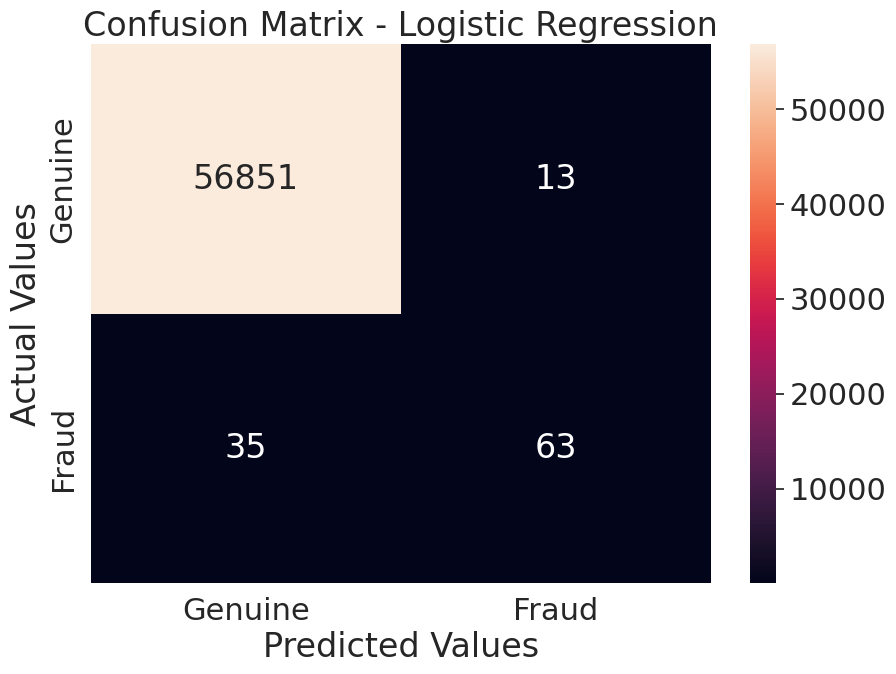

In [33]:
# Confusion Matrix for Random Forest
confusion_matrix_rf = confusion_matrix(test_y, y_predictions_rf)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [30]:
# prompt: roc auc

from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score
roc_auc = roc_auc_score(test_y, classifier.predict_proba(test_x)[:, 1])

print(f"ROC AUC Score: {roc_auc}")


ROC AUC Score: 0.9559728259621236


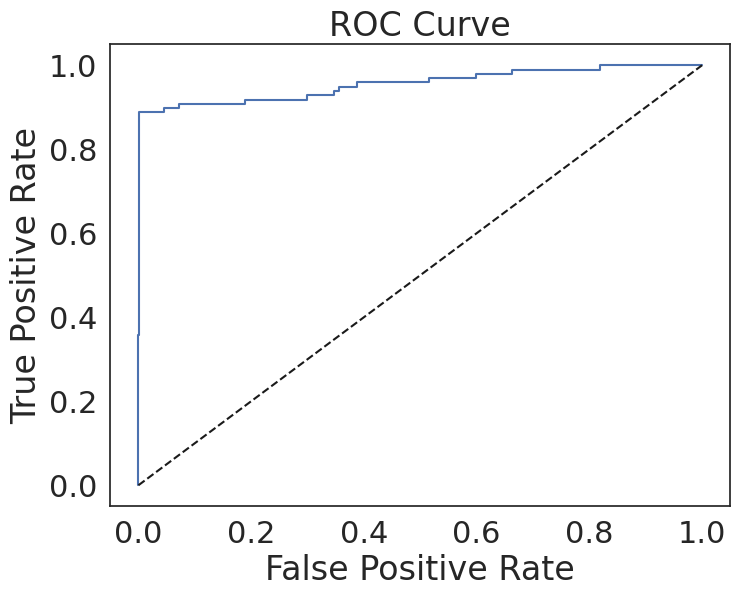

In [32]:
# prompt: plot the curve

# Assuming 'classifier' and 'test_x' are defined from the previous code.

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Predict probabilities for the positive class
y_prob = classifier.predict_proba(test_x)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [34]:
# prompt: how to improve the logistic regression model using hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga'] # Solvers that support both penalties
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the training data
grid_search.fit(train_x, train_y)


# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best ROC AUC Score: {best_score}")

# Train a new model with the best hyperparameters
best_classifier = LogisticRegression(**best_params)
best_classifier.fit(train_x, train_y)

# Evaluate the best model on the test set
y_pred_best = best_classifier.predict(test_x)

# Calculate ROC AUC score for the best model
roc_auc_best = roc_auc_score(test_y, best_classifier.predict_proba(test_x)[:, 1])

print(f"ROC AUC Score for best model: {roc_auc_best}")

# ... (rest of your evaluation code)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best ROC AUC Score: 0.9840057173972401
ROC AUC Score for best model: 0.9778004160302276


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [36]:
metrics1 = [['Accuracy',(accuracy_score(test_y, y_pred_best))],
                         ['Precision',precision_score(test_y, y_pred_best)],
                         ['Recall', recall_score(test_y, y_pred_best)],
                         ['F1_score',f1_score(test_y, y_pred_best)]]
metrics1_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics1_df

,Metrics,Results
0,Accuracy,0.999105
1,Precision,0.830986
2,Recall,0.602041
3,F1_score,0.698225


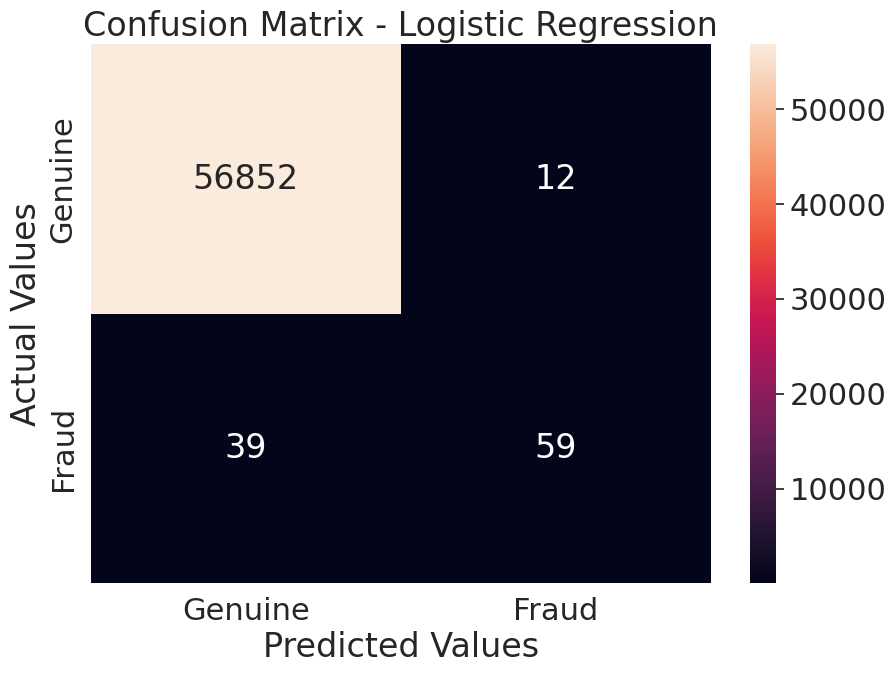

In [37]:
confusion_matrix = confusion_matrix(test_y, y_pred_best)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

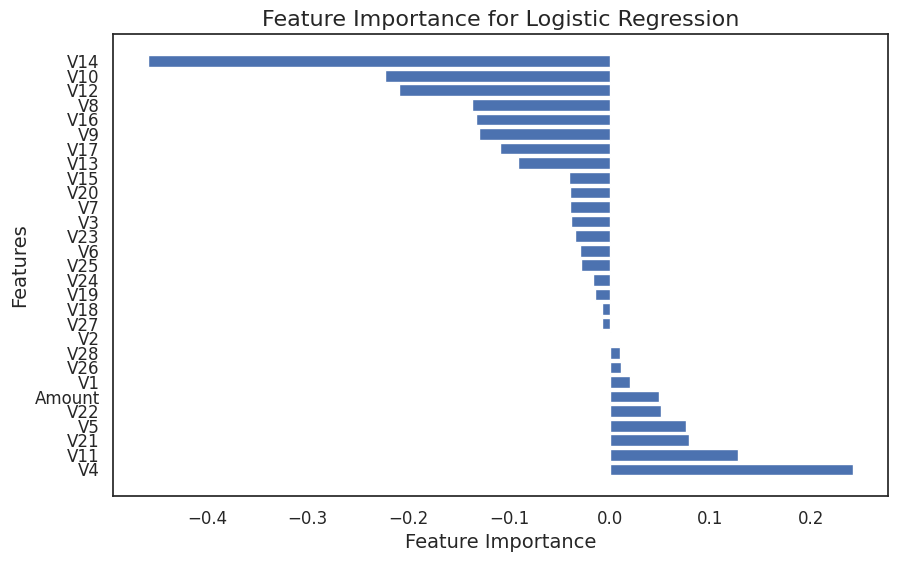

In [39]:
# prompt: feature importance model, adjust the font size in the plot

import matplotlib.pyplot as plt

# ... (your existing code)

# Assuming 'best_classifier' is your trained model
feature_importance = best_classifier.coef_[0]  # Assuming Logistic Regression

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': train_x.columns, 'Importance': feature_importance})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plotting feature importance with adjusted font size
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance', fontsize=14) # Increased font size
plt.ylabel('Features', fontsize=14) # Increased font size
plt.title('Feature Importance for Logistic Regression', fontsize=16) # Increased font size
plt.xticks(fontsize=12) # Increased font size
plt.yticks(fontsize=12) # Increased font size
plt.show()


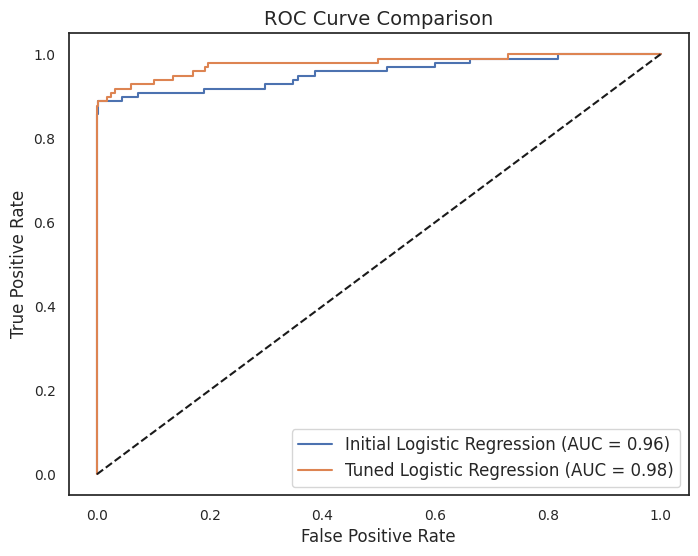

In [40]:
# prompt: compare the two models using graph

# Assuming 'classifier' is your initial Logistic Regression model
# and 'best_classifier' is the model after hyperparameter tuning

# Predict probabilities for the positive class for both models
y_prob_initial = classifier.predict_proba(test_x)[:, 1]
y_prob_best = best_classifier.predict_proba(test_x)[:, 1]

# Compute ROC curves for both models
fpr_initial, tpr_initial, thresholds_initial = roc_curve(test_y, y_prob_initial)
fpr_best, tpr_best, thresholds_best = roc_curve(test_y, y_prob_best)

# Calculate ROC AUC scores for both models
roc_auc_initial = roc_auc_score(test_y, y_prob_initial)
roc_auc_best = roc_auc_score(test_y, y_prob_best)


# Plot ROC curves for both models on the same plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_initial, tpr_initial, label=f'Initial Logistic Regression (AUC = {roc_auc_initial:.2f})')
plt.plot(fpr_best, tpr_best, label=f'Tuned Logistic Regression (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [42]:
# prompt: roc auc

from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score
roc_auc = roc_auc_score(test_y, best_classifier.predict_proba(test_x)[:, 1])

print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.9778004160302276


In [ ]:


# import pickle
# filename = 'finalized_model.pkl'
# pickle.dump(classifier, open(filename, 'wb'))
